<a href="https://colab.research.google.com/github/Struth-Rourke/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Assignment_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-17 20:32:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-03-17 20:32:09 (614 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [177]:
import pandas as pd
import numpy as np
from scipy import stats


names = ['party','handicapped-infants','water-project',
         'budget','physician-fee-freeze', 'el-salvador-aid',
         'religious-groups','anti-satellite-ban',
         'aid-to-contras','mx-missile','immigration',
         'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

df = pd.read_csv('house-votes-84.data', names = names)
df = df.replace({'y':1, 'n':0, '?':np.NaN})

print(df.shape)
print('.....')

print(df['party'].value_counts())
print('.....')

df.head()

(435, 17)
.....
democrat      267
republican    168
Name: party, dtype: int64
.....


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [0]:
##### Confidence Interval #####

# CI Function

def confidence_interval(data, confidence = .95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # Pass extra parameter (ddof) to calculate **sample** standard deviation
  s = data.std(ddof = 1)
  stderr = s / np.sqrt(n) 
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t * stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [194]:
# Mean, Lower, Upper -- Democrats

mean, lower, upper = confidence_interval(dem['crime'].dropna())

print('Lower Bound: ' + str(lower))
print('Mean: ' + str(mean))
print('Upper Bound: ' + str(upper))

print('.....')

# Margin of Error

moe = mean - lower

print('Margin of Error: ' + str(moe))

Lower Bound: 0.2914817910969736
Mean: 0.35019455252918286
Upper Bound: 0.4089073139613921
.....
Margin of Error: 0.05871276143220927


In [195]:
# Mean, Lower, Upper -- Republicans

mean, lower, upper = confidence_interval(rep['crime'].dropna())

print('Lower Bound: ' + str(lower))
print('Mean: ' + str(mean))
print('Upper Bound: ' + str(upper))

print('.....')

# Margin of Error

moe = mean - lower

print('Margin of Error: ' + str(moe))


Lower Bound: 0.960253517544598
Mean: 0.9813664596273292
Upper Bound: 1.0024794017100602
.....
Margin of Error: 0.02111294208273118


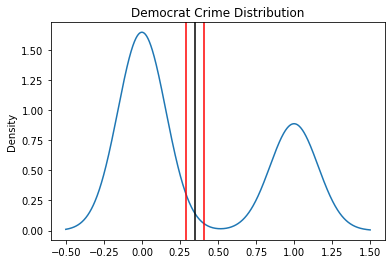

In [201]:
# Democrat Graph

import matplotlib.pyplot as plt

CI_dem = confidence_interval(dem['crime'].dropna())

dem['crime'].plot.density();
plt.title('Democrat Crime Distribution')
plt.axvline(x = CI_dem[1], color = 'red') # Lower Bound
plt.axvline(x = CI_dem[0], color = 'black') # Mean Bound
plt.axvline(x = CI_dem[2], color = 'red') # Upper Bound

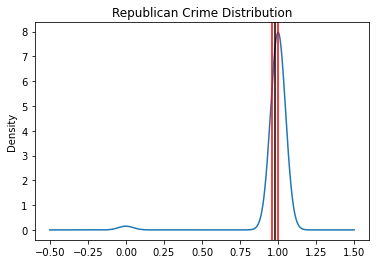

In [204]:
# Republican Graph

import matplotlib.pyplot as plt

CI_rep = confidence_interval(rep['crime'].dropna())

rep['crime'].plot.density();
plt.title('Republican Crime Distribution')
plt.axvline(x = CI_rep[1], color = 'red') # Lower Bound
plt.axvline(x = CI_rep[0], color = 'black') # Mean Bound
plt.axvline(x = CI_rep[2], color = 'red') # Upper Bound

## **Conclusion:**

***Democrats Graph:***

This graph says that the probability of democrats voting yes (i.e. 1) is lower relative to the probability of them voting no (i.e. 0). The area under the curve is used for calculating these probabilities. 

From a Margin of Error perspective, there is a higher margin of error for democrats than for republicans -- this has to due with the vast majority of republicans voting yes, and a more mixed voting record for deomcrats, on this particular issue

***Republicans Graph:***

This graph says that the probability of democrats voting yes (i.e. 1) is much higher relative to the probability of them voting no (i.e. 0). The area under the curve is used for calculating these probabilities. 

From a Margin of Error perspective, there is a higher margin of error for democrats than for republicans -- this has to due with the vast majority of republicans voting yes, and a more mixed voting record for deomcrats, on this particular issue. It also indicates that the confidence interval calculated for republicans is more reliable as the margin of error is lower relative to that of democrats.


In [6]:
##### Chi-squared Tests: #####

from google.colab import files
uploaded = files.upload()

Saving student.zip to student.zip


In [7]:
!unzip student.zip

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [119]:
# Read in csv -- 'mat' = 'math class'
df_mat = pd.read_csv('student-mat.csv', sep = ';')
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [136]:
# Crosstab of Sex and Study Time -- Studytime dependent on sex?

observed_freq = pd.crosstab(df_mat['sex'], df_mat['studytime'], margins = True)
observed_freq

studytime,1,2,3,4,All
sex,,,,,
F,27,113,51,17,208
M,78,85,14,10,187
All,105,198,65,27,395


In [137]:
# Crosstab Values ONLY

observed = pd.crosstab(df_mat['sex'], df_mat['studytime'])
observed = observed.values
observed

array([[ 27, 113,  51,  17],
       [ 78,  85,  14,  10]])

In [138]:
# Row Sums

row_sums = observed_freq.iloc[0:2, 4:].values
row_sums = row_sums.T[0]

row_sums

array([208, 187])

In [140]:
# Column Sums

col_sums = observed_freq.iloc[2:, 0:4].values
col_sums = col_sums[0]

col_sums

array([105, 198,  65,  27])

In [141]:
# Total Observations

total_total = df_mat.shape[0]
total_total

395

In [142]:
# Expected Values

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i] / total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 4)
[[ 55.29113924 104.26329114  34.2278481   14.21772152]
 [ 49.70886076  93.73670886  30.7721519   12.78227848]]


In [172]:
# Confirming that the shapes match up so as to be able to apply across rows and columns

print(observed.shape)

(2, 4)


In [154]:
# Chi^2 via Hand

chi2 = ((observed - expected)**2 / expected).sum()
chi2

50.634037705651764

In [171]:
# Chi^2 via Scipy

from scipy import stats

chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

50.634037705651764
5.854045926336989e-11
3
[[ 55.29113924 104.26329114  34.2278481   14.21772152]
 [ 49.70886076  93.73670886  30.7721519   12.78227848]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)